In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
import os
#from HOScodes import *

In [35]:
plt.style.use('~/plots/presentation.mplstyle') #only to load mpl style params #Fix latex compiler

# Intrinsic Alignments Infused simulations

In [5]:
dir_results = '/pscratch/sd/j/jatorres/data/HOScodes/SkySim5000IA/'

## map2alm

In [4]:
ax_d = {'0':(0,0),'1':(0,1),'2':(0,2),'3':(1,0),'4':(1,1)} #plot axes dict
ell_map2_bins = np.arange(0,5001,1)
ell_rb = ell_map2_bins[50:-1].reshape(99,50).mean(axis=1) #x-axis map2

l1 = Line2D([0],[0],lw=2,c='k')# line element for legends
l2 = Line2D([0],[0],lw=2,c='r')

In [154]:
IA_model = 'NLA'
IA_params_dict = {'noIA':['noIA'],
                  'NLA':['AIAp1','AIAm1'],
                  'deltaNLA':['AIAp1_bta1','AIAp1_bta2'],
                  'deltaTT':['C2m1_bta1','C2p1_bta1'],
                  'TATT':['AIAp1_C2p1_bta1'],
                  'TT':['C2p1','C2m1'],
                  'HODNLA':['AIAp1'],
                  'HODTT':['A2p1']}
free_par = IA_params_dict[IA_model]
f0 = free_par[0]

SkySim5000_map2_IA = []
SkySim5000_map2_noIA = []

p=0
q = 0
for i in range(1,6):
    p = i - 1
    #print('saving bin (%d,%d)'%(i,i),'index:',int(10 - (5 - p)*(4-p)/2 + p))
    SkySim5000_map2_noIA.append(np.loadtxt(dir_results+'noIA/map2/kappa_skysim5000_noIA_noisefree_tomo%d_Nmap%d_map2_Cell_ell_0_5000.dat'%(i,i)))
    SkySim5000_map2_IA.append(np.loadtxt(dir_results+IA_model+'/map2/kappa_skysim5000_'+IA_model+'_'+f0+'_noisefree_tomo%d_Nmap%d_map2_Cell_ell_0_5000.dat'%(i,i)))
    #SkySim5000_map2_IA.append(np.loadtxt(dir_results+IA_model+'/map2/kappa_skysim5000_'+f0+'_'+IA_model+'_noisefree_tomo%d_Nmap%d_map2_Cell_ell_0_5000.dat'%(i,i)))
    for j in range(i+1,6):
        q = j - 1
    #    print('saving bin (%d,%d)'%(i,j),'index:',int(10 - (5 - p)*(4-p)/2 + q))
#        print('saving bin (%d,%d)'%(i,j),'index:',)
        SkySim5000_map2_noIA.append(np.loadtxt(dir_results+'noIA/map2/kappa_skysim5000_noIA_noisefree_tomo%d_Nmap%d_%d_map2_Cell_ell_0_5000.dat'%(j,j,i)))
        SkySim5000_map2_IA.append(np.loadtxt(dir_results+IA_model+'/map2/kappa_skysim5000_'+IA_model+'_'+f0+'_noisefree_tomo%d_Nmap%d_%d_map2_Cell_ell_0_5000.dat'%(j,j,i)))
        #SkySim5000_map2_IA.append(np.loadtxt(dir_results+IA_model+'/map2/kappa_skysim5000_'+f0+'_'+IA_model+'_noisefree_tomo%d_Nmap%d_%d_map2_Cell_ell_0_5000.dat'%(j,j,i)))

In [155]:
map2_rebinned_mean_noIA = []
map2_rebinned_mean_IA = []
map2_rebinned_std_noIA = []
map2_rebinned_std_IA = []
for i in range(15):
    map2_rb = SkySim5000_map2_noIA[i][50:-1].reshape(99,50) #this is only a linear rebinning. Maybe try log-binning later
    map2_rb_mean = np.mean(map2_rb,axis=1)
    map2_rb_std = np.std(map2_rb,axis=1)
    map2_rebinned_mean_noIA.append(map2_rb_mean)
    map2_rebinned_std_noIA.append(map2_rb_std)
    map2_rb = SkySim5000_map2_IA[i][50:-1].reshape(99,50)
    map2_rb_mean = np.mean(map2_rb,axis=1)
    map2_rb_std = np.std(map2_rb,axis=1)
    map2_rebinned_mean_IA.append(map2_rb_mean)
    map2_rebinned_std_IA.append(map2_rb_std)

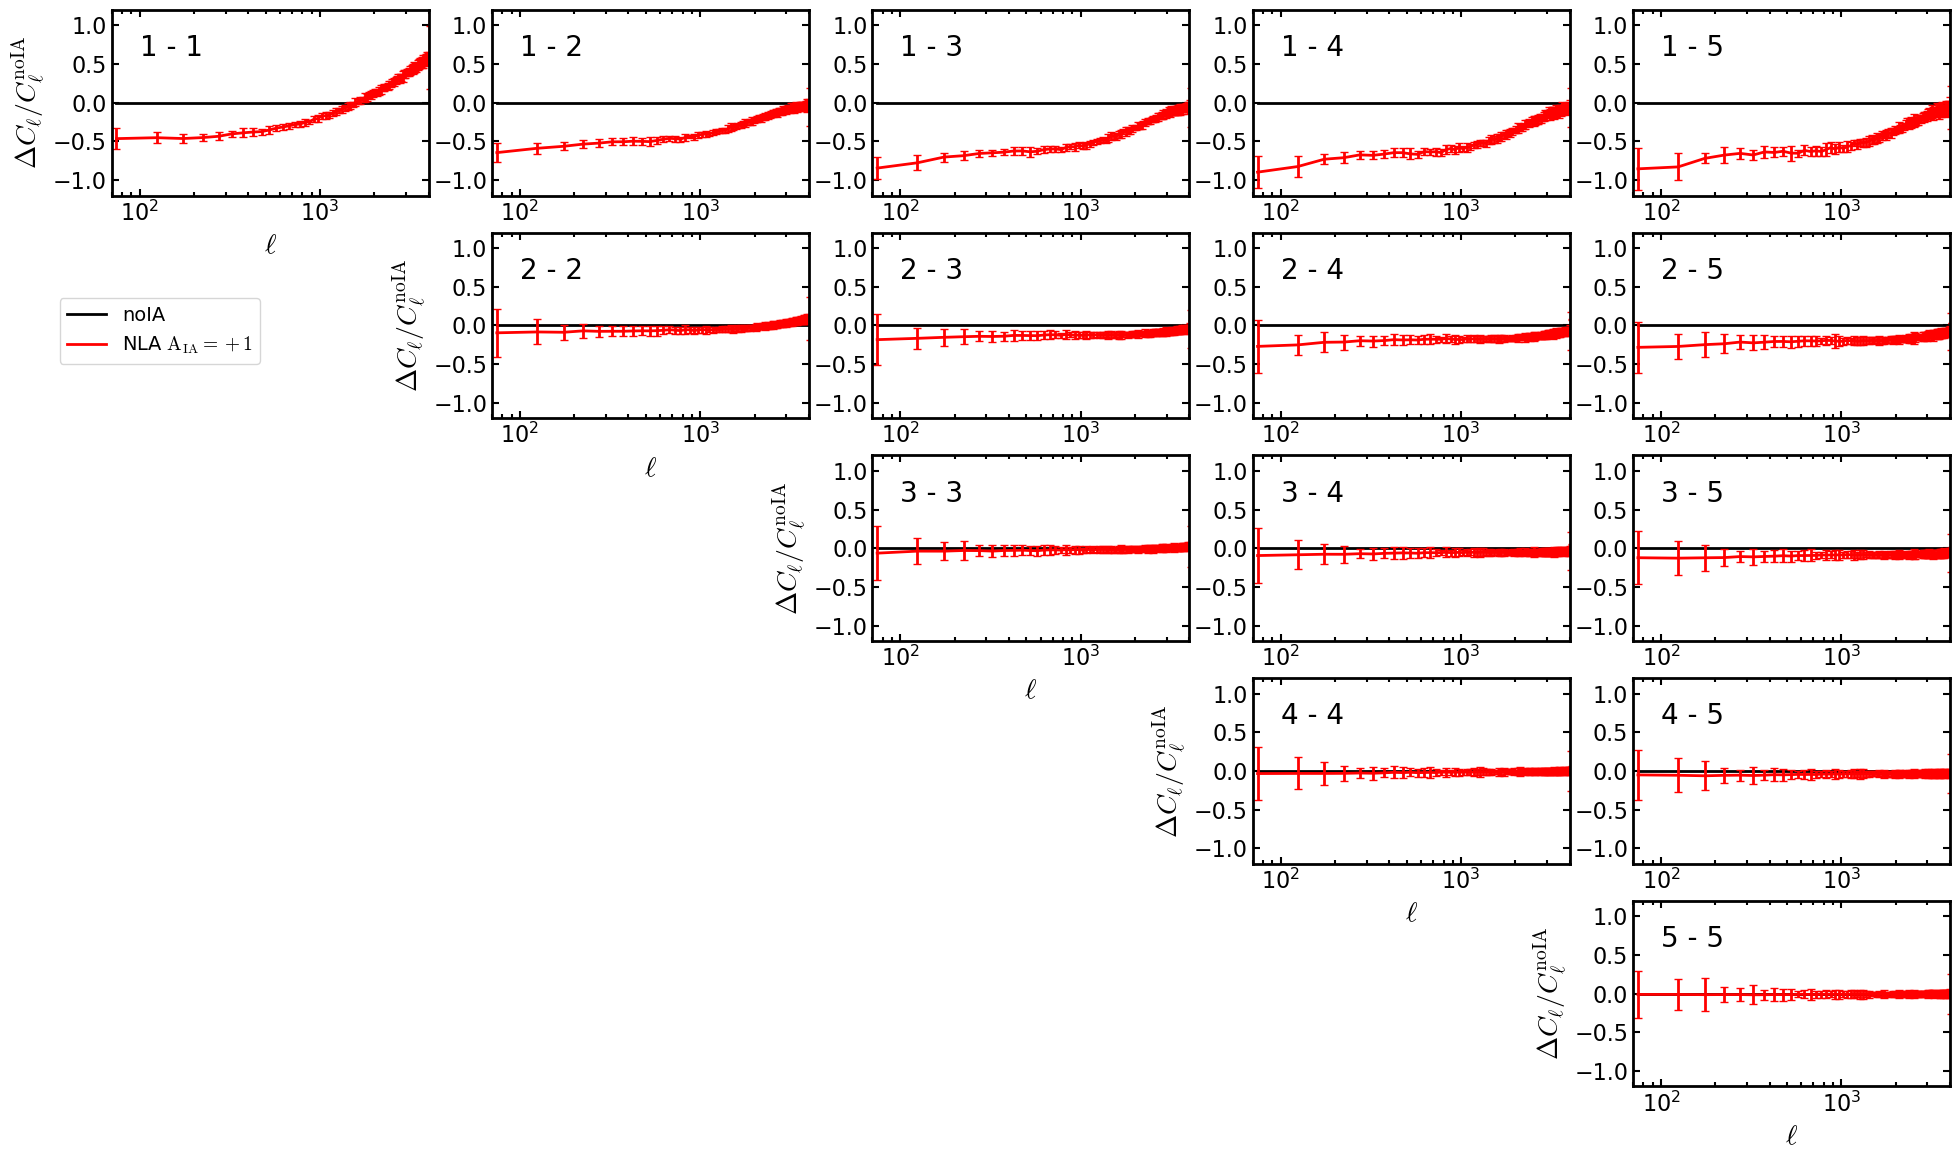

In [156]:
p=0
q = 0
f,ax = plt.subplots(5,5,figsize=(20,12),sharex=False,sharey=False)
for i in range(1,6):
    p = i - 1
    index1 = int(10 - (5 - p)*(4-p)/2 + p)
    ax[i-1,i-1].plot(ell_rb,np.zeros_like(map2_rebinned_mean_noIA[index1]),'k-',lw=2)
    #ax[i-1,i-1].plot(ell_rb,map2_rebinned_mean_NLAp1[index1]/(map2_rebinned_mean_noIA[index1])-1,'r-',lw=2)
    ax[i-1,i-1].errorbar(ell_rb,map2_rebinned_mean_IA[index1]/(map2_rebinned_mean_noIA[index1])-1,yerr=map2_rebinned_std_IA[index1]/(map2_rebinned_mean_noIA[index1]),fmt='r-',lw=2)
    ax[i-1,i-1].set_ylim(-1.2,1.2)
    ax[i-1,i-1].set_yticks([-1,-0.5,0,0.5,1])
    ax[i-1,i-1].set_xlim(7e1,4e3)
    ax[i-1,i-1].set_xscale('log')
    ax[i-1,i-1].set_xlabel(r'$\ell$')
    ax[i-1,i-1].set_ylabel(r'$\Delta C_{\ell}/C_{\ell}^{\rm noIA}$')
    ax[i-1,i-1].text(1e2,0.6,'%d - %d'%(i,i))
    #print('index: %d'%index1)
    for j in range(i+1,6):
        q = j - 1
        f.delaxes(ax[j-1,i-1])
        index2 = int(10 - (5 - p)*(4-p)/2 + q)
        ax[i-1,j-1].plot(ell_rb,np.zeros_like(map2_rebinned_mean_noIA[index2]),'k-',lw=2)
        #ax[i-1,j-1].plot(ell_rb,map2_rebinned_mean_NLAp1[index2]/(map2_rebinned_mean_noIA[index2])-1,'r-',lw=2)
        ax[i-1,j-1].errorbar(ell_rb,map2_rebinned_mean_IA[index2]/(map2_rebinned_mean_noIA[index2])-1,yerr=np.abs(map2_rebinned_std_IA[index2]/(map2_rebinned_mean_noIA[index2])),fmt='r-',lw=2)
        ax[i-1,j-1].set_ylim(-1.2,1.2)
        ax[i-1,j-1].set_yticks([-1,-0.5,0,0.5,1])
        ax[i-1,j-1].set_xlim(7e1,4e3)
        ax[i-1,j-1].set_xscale('log')
        ax[i-1,j-1].set_xlabel(r'$\ell$')
        ax[i-1,j-1].text(1e2,0.6,'%d - %d'%(i,j))
        #print('index: %d'%index2)

#ax[0,0].set_yscale('log')
ax[0,0].legend([l1,l2],['noIA',r'NLA ${\rm A}_{\rm IA} = +1$'],bbox_to_anchor=(0.5,-0.5))
plt.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.2)
#plt.savefig('/global/homes/j/jatorres/HOS-Y1-prep/hoscodes/imgs/IAinfusion/map2alm_auto_cross_NLAAIAp1_0ellbins_0_5001_rebinned.jpg',bbox_inches='tight')
plt.show()

## $M_{\rm ap}^3$

In [157]:
from itertools import combinations_with_replacement

In [158]:
theta_tr = combinations_with_replacement([4,8,16,32],3)
theta_tr_map3_bins = list(theta_tr)
theta_tr_map3_bins
theta_format = [ '{0}\' {1}\' {2}\' '.format(*tr) for tr in theta_tr_map3_bins ]

In [159]:
SkySim5000_map3_IA = []
SkySim5000_map3_noIA = []

p=0
q = 0
for i in range(1,6):
    p = i - 1
    #print('saving bin (%d,%d)'%(i,i),'index:',int(10 - (5 - p)*(4-p)/2 + p))
    SkySim5000_map3_noIA.append(np.loadtxt(dir_results+'noIA/map3/kappa_skysim5000_noIA_noisefree_tomo%d_map3_DV_thetas.dat'%(i)))
    SkySim5000_map3_IA.append(np.loadtxt(dir_results+IA_model+'/map3/kappa_skysim5000_'+IA_model+'_'+f0+'_noisefree_tomo%d_map3_DV_thetas.dat'%(i)))
    #SkySim5000_map3_IA.append(np.loadtxt(dir_results+IA_model+'/map3/kappa_skysim5000_'+f0+'_'+IA_model+'_noisefree_tomo%d_map3_DV_thetas.dat'%(i)))


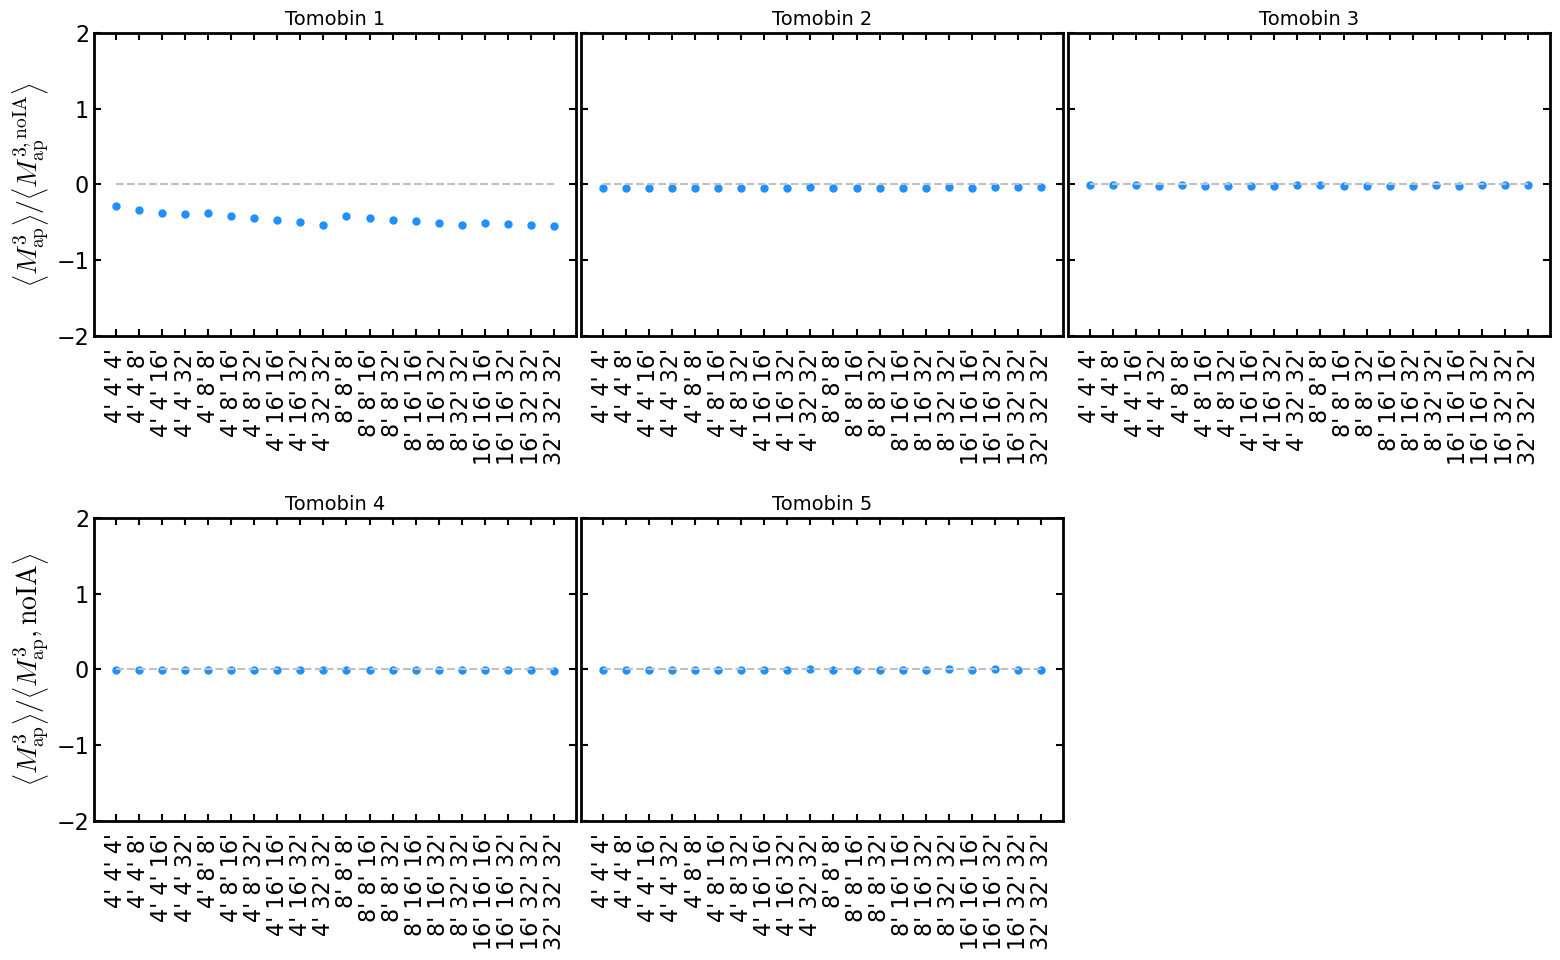

In [162]:
f,ax = plt.subplots(2,3,figsize=(16,10),sharex=False,sharey=True)

ax[ax_d['0']].set_ylabel(r'$\left<{ M_{\rm ap}^3 }\right>/\left<{ M_{\rm ap}^{3,\rm noIA} }\right>$')
ax[ax_d['3']].set_ylabel(r'$\left<{ M_{\rm ap}^3 }\right>/\left<{ M_{\rm ap}^3 ,\rm noIA}\right>$')
for i in range(5):
    l0, = ax[ax_d['%d'%i]].plot(np.arange(20),SkySim5000_map3_IA[i]/SkySim5000_map3_noIA[i] - 1,c='dodgerblue',ms=10,marker='.',ls=' ')
    l0, = ax[ax_d['%d'%i]].plot(np.arange(20),np.zeros_like(SkySim5000_map3_IA[i]),ls='--',lw=1.5)
    ax[ax_d['%d'%i]].set_xticks(np.arange(20))
    ax[ax_d['%d'%i]].set_xticklabels(theta_format, minor=False, rotation=90)
    ax[ax_d['%d'%i]].set_title('Tomobin %d'%(i+1),fontsize=14)
f.delaxes(ax[1,2])    
#a1 = ax[1,1].legend([l1,l2,l3,l4],['Theory',r'$N_{\rm shells} = 19$',r'$N_{\rm shells} = 50$',r'$N_{\rm shells} = 106$'],loc=1,bbox_to_anchor=(1.7,1.0))
#ax[0,0].set_yscale('log')
#ax[0].set_xscale('log')
ax[0,0].set_ylim(-2,2)
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
plt.show()
#plt.savefig('imgs/DESC_meeting/map3_Nshells_19_50_106.pdf',bbox_inches='tight')

## PDF

In [8]:
bins=np.linspace(-0.1-0.001,0.1+0.001,201) 
binmids_kappacounts=(bins[1:]+bins[:-1])/2

In [16]:
ax_d = {'0':(0,0),'1':(0,1),'2':(0,2),'3':(1,0),'4':(1,1)} #plot axes dict
ell_map2_bins = np.arange(0,5001,1)
ell_rb = ell_map2_bins[50:-1].reshape(99,50).mean(axis=1) #x-axis map2

l1 = Line2D([0],[0],lw=2,c='k')# line element for legends
l2 = Line2D([0],[0],lw=2,c='r')

In [7]:
sl = [1,2,3,4,5]# smoothing 5,8,10 arcmin respectively.
s_i = sl[0]

In [11]:
IA_model = 'NLA'
IA_params_dict = {'noIA':['noIA'],
                  'NLA':['AIAp1','AIAm1'],
                  'deltaNLA':['AIAp1_bta1','AIAp1_bta2'],
                  'deltaTT':['C2m1_bta1','C2p1_bta1'],
                  'TATT':['AIAp1_C2p1_bta1'],
                  'TT':['C2p1','C2m1'],
                  'HODNLA':['AIAp1'],
                  'HODTT':['A2p1']}
free_par = IA_params_dict[IA_model]
f0 = free_par[0]

SkySim5000_PDF_IA = []
SkySim5000_PDF_noIA = []

dir_results = '/pscratch/sd/j/jatorres/data/HOScodes/SkySim5000IA/'

p=0
q = 0
for i in range(1,6):
    p = i - 1
    #print('saving bin (%d,%d)'%(i,i),'index:',int(10 - (5 - p)*(4-p)/2 + p))
    SkySim5000_PDF_noIA.append(np.loadtxt(dir_results+'noIA/PDF/smoothed_theta%d_kappa_skysim5000_noIA_noisefree_tomo%d_Nmap%d_Counts_kappa_width0.1_200Kappabins.dat'%(s_i,i,i)))
    SkySim5000_PDF_IA.append(np.loadtxt(dir_results+IA_model+'/PDF/smoothed_theta%d_kappa_skysim5000_'%s_i+IA_model+'_'+f0+'_noisefree_tomo%d_Nmap%d_Counts_kappa_width0.1_200Kappabins.dat'%(i,i)))
    #SkySim5000_map2_IA.append(np.loadtxt(dir_results+IA_model+'/map2/kappa_skysim5000_'+f0+'_'+IA_model+'_noisefree_tomo%d_Nmap%d_map2_Cell_ell_0_5000.dat'%(i,i)))
    for j in range(i+1,6):
        q = j - 1
    #    print('saving bin (%d,%d)'%(i,j),'index:',int(10 - (5 - p)*(4-p)/2 + q))
#        print('saving bin (%d,%d)'%(i,j),'index:',)
        SkySim5000_PDF_noIA.append(np.loadtxt(dir_results+'noIA/PDF/smoothed_theta%d_kappa_skysim5000_noIA_noisefree_tomo%d_Nmap%d_Nmap%d_Counts_kappa_width0.1_200Kappabins.dat'%(s_i,j,j,i)))
        SkySim5000_PDF_IA.append(np.loadtxt(dir_results+IA_model+'/PDF/smoothed_theta%d_kappa_skysim5000_'%s_i+IA_model+'_'+f0+'_noisefree_tomo%d_Nmap%d_Nmap%d_Counts_kappa_width0.1_200Kappabins.dat'%(j,j,i)))
        #SkySim5000_map2_IA.append(np.loadtxt(dir_results+IA_model+'/map2/kappa_skysim5000_'+f0+'_'+IA_model+'_noisefree_tomo%d_Nmap%d_%d_map2_Cell_ell_0_5000.dat'%(j,j,i)))

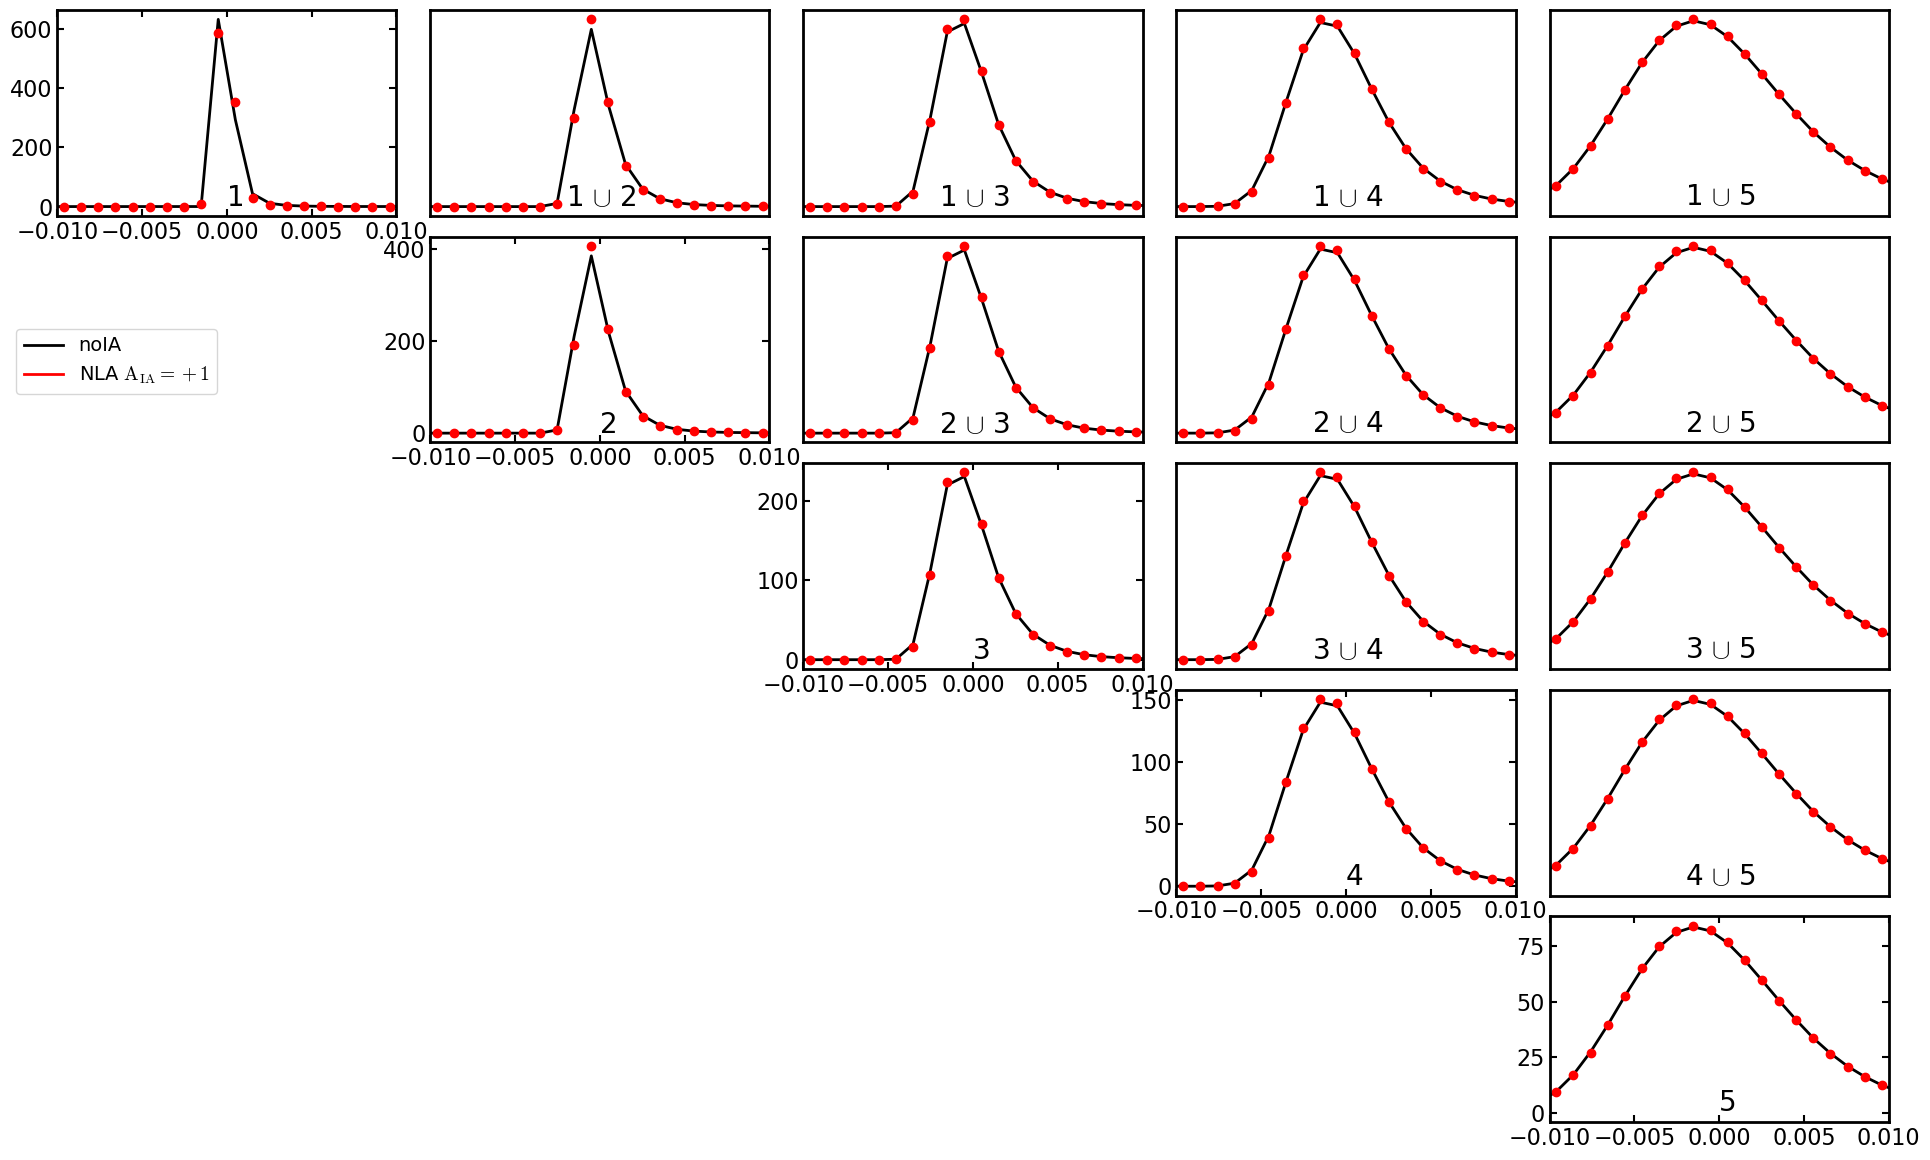

In [37]:
p=0
q = 0
f,ax = plt.subplots(5,5,figsize=(20,12),sharex=False,sharey=False)
for i in range(1,6):
    p = i - 1
    index1 = int(10 - (5 - p)*(4-p)/2 + p)
    ax[i-1,i-1].plot(binmids_kappacounts,SkySim5000_PDF_noIA[index1],'k-',lw=2)
    ax[i-1,i-1].plot(binmids_kappacounts,SkySim5000_PDF_IA[index1],'ro')

    ax[i-1,i-1].set_xlim(-0.01,0.01)
    #ax[i-1,i-1].set_xscale('log')
    #ax[i-1,i-1].set_xlabel(r'$\ell$')
    #ax[i-1,i-1].set_ylabel(r'$\Delta C_{\ell}/C_{\ell}^{\rm noIA}$')
    ax[i-1,i-1].text(-0.00,0.6,'%d'%(i))
    #print('index: %d'%index1)
    

    for j in range(i+1,6):
        q = j - 1
        f.delaxes(ax[j-1,i-1])
        index2 = int(10 - (5 - p)*(4-p)/2 + q)
        ax[i-1,j-1].plot(binmids_kappacounts,SkySim5000_PDF_noIA[index2],'k-',lw=2)
        ax[i-1,j-1].plot(binmids_kappacounts,SkySim5000_PDF_IA[index2],'ro')
        #ax[i-1,j-1].set_ylim(-1.2,1.2)
        ax[i-1,j-1].set_xlim(-0.01,0.01)
        ax[i-1,j-1].set_yticks([])
        ax[i-1,j-1].set_xticks([])        
        #ax[i-1,j-1].set_xlim(7e1,4e3)
        #ax[i-1,j-1].set_xscale('log')
        #ax[i-1,j-1].set_xlabel(r'$\ell$')
        ax[i-1,j-1].text(-0.002,0.6,'%d $\cup$ %d'%(i,j))
        #print('index: %d'%index2)
#ax[0,0].set_yscale('log')
ax[0,0].legend([l1,l2],['noIA',r'NLA ${\rm A}_{\rm IA} = +1$'],bbox_to_anchor=(0.5,-0.5))
plt.tight_layout()
plt.subplots_adjust(wspace=0.1,hspace=0.1)
plt.savefig('/global/homes/j/jatorres/plots/PDF_cross_bins.jpg',bbox_inches='tight')
plt.show()

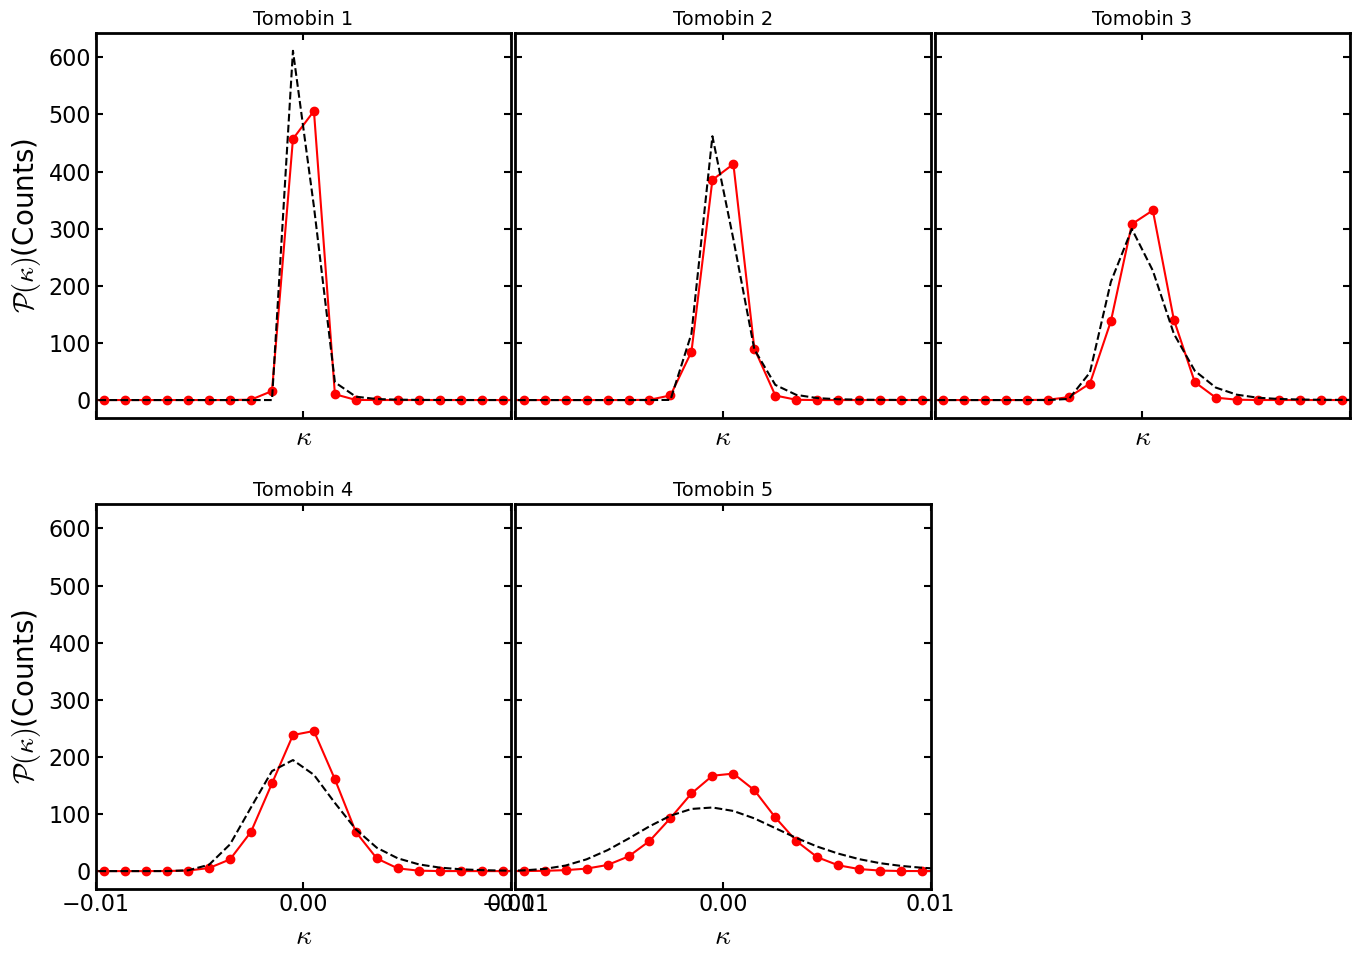

In [149]:
ax_d = {'0':(0,0),'1':(0,1),'2':(0,2),'3':(1,0),'4':(1,1)}

f,ax = plt.subplots(2,3,figsize=(14,10),sharex=True,sharey=True)

ax[ax_d['0']].set_ylabel(r'$\mathcal{P}(\kappa)$(Counts)')
ax[ax_d['3']].set_ylabel(r'$\mathcal{P}(\kappa)$(Counts)')

for i in range(5):
    #counts_peaks,bins=np.histogram(SkySim5000_peaks_IA[i],density=False,bins=bins)
    #counts_minima,bins=np.histogram(SkySim5000_minima_IA[i],density=False,bins=bins)

    #counts_peaks_noIA,bins=np.histogram(SkySim5000_peaks_noIA[i],density=False,bins=bins)
    #counts_minima_noIA,bins=np.histogram(SkySim5000_minima_noIA[i],density=False,bins=bins)

#    l1, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,SkySim5000_PDF_NLA_AIAp1[i],color='indigo',marker='o',ls='-')
#    l2, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,counts_peaks,color='red',marker='o',ls='--')
#    l3, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,counts_minima,color='red',marker='o',ls=':')
    m1, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,SkySim5000_PDF_IA[i],color='red',marker='o',ls='-')
    ax[ax_d['%d'%i]].plot(binmids_kappacounts,SkySim5000_PDF_noIA[i],color='k',ls='--')
#    m2, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,counts_peaks_noIA,color='black',marker='o',ls='--')
#    m3, = ax[ax_d['%d'%i]].plot(binmids_kappacounts,counts_minima_noIA,color='black',marker='o',ls=':')
    #
    ax[ax_d['%d'%i]].set_xticks([-0.02,-0.01,0.0,0.01,0.02])
    ax[ax_d['%d'%i]].set_title('Tomobin %d'%(i+1),fontsize=14)
    ax[ax_d['%d'%i]].set_xlim(-0.03,0.03)
    ax[ax_d['%d'%i]].set_xlabel(r'$\kappa$')
#a1 = ax[1,1].legend([l1,l2,l3,l4],['Theory',r'$N_{\rm shells} = 19$',r'$N_{\rm shells} = 50$',r'$N_{\rm shells} = 106$'],loc=1,bbox_to_anchor=(1.7,1.0))
f.delaxes(ax[1,2]) 
#ax[0,0].set_yscale('log')
#ax[0,0].set_ylim(-1,1)
ax[0,0].set_xlim(-0.01,0.01)
plt.tight_layout()
plt.subplots_adjust(wspace=0.01)
#plt.savefig('imgs/DESC_meeting/PDF_Nshells_19_50_106.pdf',bbox_inches='tight')
plt.show()